<a href="https://colab.research.google.com/github/ericcurtygiorno/Desafio_Tecnico_OnCase/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import precision_score, f1_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

sns.set(rc={'figure.figsize':(6,4)})
import warnings
warnings.simplefilter("ignore")

In [ ]:
train = pd.read_csv('/content/classification_train.csv')
test = pd.read_csv('/content/classification_test.csv')

In [ ]:
train.describe()

,x1,x2,target
count,670.000000,670.000000,670.000000
mean,0.481824,0.262611,0.505970
std,0.914772,0.615023,0.500338
min,-1.939767,-1.313970,0.000000
25%,-0.169615,-0.159189,0.000000
50%,0.492489,0.275538,1.000000
75%,1.159680,0.717589,1.000000
max,2.590410,1.904169,1.000000


In [ ]:
test.describe()

,x1,x2,target
count,330.000000,330.000000,330.000000
mean,0.472470,0.266104,0.487879
std,0.986760,0.583819,0.500612
min,-1.693028,-1.031435,0.000000
25%,-0.264152,-0.190844,0.000000
50%,0.503077,0.240346,0.000000
75%,1.218472,0.680558,1.000000
max,2.528373,1.783693,1.000000


In [ ]:
train.target.value_counts()

1    339
0    331
Name: target, dtype: int64

In [ ]:
test.target.value_counts()

0    169
1    161
Name: target, dtype: int64

In [ ]:
train.duplicated().sum()

0

In [ ]:
test.duplicated().sum()

0

In [ ]:
train.isnull().sum()

x1        0
x2        0
target    0
dtype: int64

In [ ]:
test.isnull().sum()

x1        0
x2        0
target    0
dtype: int64

In [ ]:
X_train = train.drop('target', axis=1)
X_test = test.drop('target', axis=1)
y_train = train['target']
y_test = test['target']

## Decision Tree

In [ ]:
# GridSearchCV param_grid

param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 1, 2, 3, 4, 5]
}

In [ ]:
# Decision Tree Classifier with GridSearch to find the best params

DecTree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=DecTree, param_grid=param_grid, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             verbose=2)

In [ ]:
# GridSearch best params

grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'splitter': 'best'}

In [ ]:
# Decision Tree Classifier
# Setting up the best params GridSearch has found

DecTree = DecisionTreeClassifier(criterion='entropy',
                              max_depth=5,
                              splitter='best',
                              random_state=42) 
DecTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [ ]:
y_pred = DecTree.predict(X_test)
print(f"Precision: {precision_score(y_test, y_pred)*100}%")
print(f"Recall: {recall_score(y_test, y_pred)*100}%")
print(f"F1: {f1_score(y_test, y_pred)*100}%")

Precision: 86.53846153846155%
Recall: 83.85093167701864%
F1: 85.17350157728707%


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       169
           1       0.87      0.84      0.85       161

    accuracy                           0.86       330
   macro avg       0.86      0.86      0.86       330
weighted avg       0.86      0.86      0.86       330



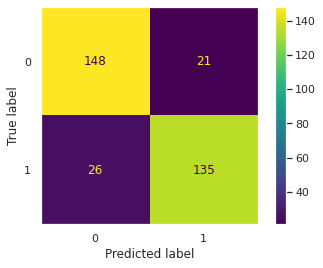

In [ ]:
ConfusionMatrixDisplay.from_estimator(DecTree, X_test, y_test)
plt.grid(False)
plt.show()

## Random Forest

In [ ]:
# GridSearchCV param_grid

param_grid = {
    'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'bootstrap': [False, True],
    'max_samples': [None, 1, 2, 3, 4, 5]
}

In [ ]:
# Random Forest Classifier with GridSearch to find the best params

RForest = RandomForestClassifier()

grid_search = GridSearchCV(estimator=RForest, param_grid=param_grid, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False, True],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_samples': [None, 1, 2, 3, 4, 5],
                         'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                                          450, 500]},
             verbose=2)

In [ ]:
# GridSearch best params

grid_search.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_samples': None,
 'n_estimators': 200}

In [ ]:
# Random Forest Classifier
# Setting up the best params GridSearch has found

RForest = RandomForestClassifier( bootstrap=True,
                              criterion='gini',
                              max_samples=None,
                              n_estimators=350,
                              random_state=42) 
RForest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=350, random_state=42)

In [ ]:
y_pred = RForest.predict(X_test)
print(f"Precision: {precision_score(y_test, y_pred)*100}%")
print(f"Recall: {recall_score(y_test, y_pred)*100}%")
print(f"F1: {f1_score(y_test, y_pred)*100}%")

Precision: 85.97560975609755%
Recall: 87.5776397515528%
F1: 86.76923076923076%


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       169
           1       0.86      0.88      0.87       161

    accuracy                           0.87       330
   macro avg       0.87      0.87      0.87       330
weighted avg       0.87      0.87      0.87       330



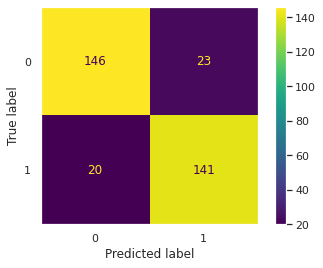

In [ ]:
ConfusionMatrixDisplay.from_estimator(RForest, X_test, y_test)
plt.grid(False)
plt.show()

In [ ]:
#!pip install explainerdashboard

In [ ]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard

In [ ]:
explainer1 = ClassifierExplainer(DecTree, X_test, y_test)

Note: model_output=='probability', so assuming that raw shap output of DecisionTreeClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)


In [ ]:
ExplainerDashboard(explainer1).run()

Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating shap interaction values... (this may take a while)
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating predictions...
Calculating pred_percentiles...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.j

<IPython.core.display.Javascript object>

In [ ]:
explainer2 = ClassifierExplainer(RForest, X_test, y_test)

Detected RandomForestClassifier model: Changing class type to RandomForestClassifierExplainer...
Note: model_output=='probability', so assuming that raw shap output of RandomForestClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)


In [ ]:
ExplainerDashboard(explainer2).run()

Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
Generating layout...
Calculating shap values...
Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating shap interaction values... (this may take a while)
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating predictions...
Calculating pred_percentiles...
Calculating ShadowDecTree for each individual decision tree...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e

<IPython.core.display.Javascript object>

## Conclusão

A variável que exerce maior impacto sobre o "target" é a variável "x2".